Flavien Moise, Tenzin Nargee, Charlie Payne, Duncan Tanner

03.12.2024

Professor Johnson

DS 3001

# GSS Project Findings

## Summary:

The project addresses the relationship between three primary data points: “RLOOKS,” a
numerical variable which evaluates the surveyor-reported physical attractiveness of the surveyee,
“OWNGUN,” a binary variable which evaluates whether or not the surveyee owns a gun a or not, and
“PRESTG10,” a categorical variable which reports the surveyee’s self reported job prestige. Our
approach to analyzing relationships involved a series of three graphs after cleaning the data cleaning: “Distribution of Job Prestige by Physical Attractive,” “Distribution of Job Prestige by Gun
Ownership,” and “Distribution of Physical Attractiveness by Gun Ownership.” The largest correlative
effects we observed existed between physical attractiveness and job prestige, and between physical
attractiveness and gun ownership. We also observed a similar distribution of kernel density between job prestige and gun ownership.

## Data:

The first variable we looked at in this analysis was “RLOOKS.” The surveyor of the variable
answered the question “How physically attractive is the respondent?” on a 1-5 scale from “very
unattractive” to “very attractive.” This variable presented the most challenges for two reasons. First being the nature of the variable required the survey to be conducted face-to-face rather than via web self-administered questionnaire. This eliminated almost half of the total respondents from being evaluated for this variable, only 1,672 out of 3,544, with “not applicable” accounting for 1,864 surveyees and “don’t know” accounting for the remainder, significantly limiting the variable’s sample size. The second issue with the “RLOOKS” variable is the subjective nature of the evaluation, which presents potential inconsistencies for its analysis.

The second variable in question was “OWNGUN,” which assessed the question “Do you
happen to have in your home (or garage) any guns or revolvers?” on a scale from 1-3 with 1 being
“YES,” 2 being “NO”, and 3 being “REFUSED.” The survey further evaluates what type of gun the
surveyee owned, but we chose to focus on the broader evaluation. The main challenge with this
variable involved converting the variable from numeric to a boolean true or false, to aid in graphical representation and digestibility, which we accomplished via the “map” function. Like “RLOOKS,” there was a considerable amount of null values that had to be dropped.

The last variable was “PRESTG10” which self-assessed the prestige of the respondents
occupation. Responses to the variable were measured on a scale from 10-89, and were collapsed and
presented in value counts for 10-point bins starting with 10-19. Only 6.2% of responses resulted in null
values.

In [16]:
#importing the data
import pandas as pd
df = pd.read_sas("data/gss2022.sas7bdat")

#Getting only the variables we care about from dataframe into interested dataframe
idf = df[['ID','PRESTG10','RLOOKS','OWNGUN']]
print(idf.shape)
print(idf.head())
print(idf.describe())

(3544, 4)
    ID  PRESTG10  RLOOKS  OWNGUN
0  1.0      39.0     3.0     2.0
1  2.0      53.0     NaN     2.0
2  3.0      48.0     NaN     2.0
3  4.0      34.0     NaN     2.0
4  5.0      38.0     NaN     2.0
                ID     PRESTG10       RLOOKS       OWNGUN
count  3544.000000  3326.000000  1672.000000  2313.000000
mean   1772.535553    44.924835     3.327751     1.691310
std    1023.268418    13.571545     0.787542     0.501553
min       1.000000    16.000000     1.000000     1.000000
25%     886.750000    35.000000     3.000000     1.000000
50%    1772.500000    45.000000     3.000000     2.000000
75%    2658.250000    54.000000     4.000000     2.000000
max    3545.000000    80.000000     5.000000     3.000000


In [17]:
#DATAFRAME FOR GRAPH #1, THE PRESTIGE BOX PLOTS PER ATTRACTIVENESS LEVEL
padf = idf[['PRESTG10','RLOOKS']]
print(padf['PRESTG10'].value_counts())
print(padf['RLOOKS'].value_counts())

35.0    222
31.0    190
48.0    168
38.0    151
61.0    134
64.0    126
39.0    123
47.0    120
45.0    118
53.0    116
28.0    115
60.0    114
25.0     99
50.0     85
32.0     79
44.0     75
49.0     73
46.0     67
33.0     66
51.0     66
24.0     62
36.0     59
65.0     54
43.0     52
59.0     47
42.0     46
34.0     45
37.0     41
62.0     38
69.0     38
21.0     36
40.0     36
63.0     35
72.0     34
52.0     34
55.0     28
74.0     28
54.0     27
29.0     26
41.0     23
80.0     21
22.0     21
70.0     19
66.0     17
58.0     17
27.0     17
73.0     15
26.0     15
56.0     14
57.0     11
17.0     11
30.0      9
67.0      9
75.0      8
71.0      7
16.0      6
20.0      5
18.0      5
68.0      2
23.0      1
Name: PRESTG10, dtype: int64
3.0    915
4.0    485
5.0    122
2.0    119
1.0     31
Name: RLOOKS, dtype: int64


In [18]:
# Looking for missing values 
print(padf['PRESTG10'].isnull().sum())
print(padf['RLOOKS'].isnull().sum())

218
1872


In [19]:
padf.dropna(subset=['PRESTG10'], inplace=True)
padf.dropna(subset=['RLOOKS'], inplace=True)
print(padf.shape)
print(padf['PRESTG10'].isnull().sum())
print(padf['RLOOKS'].isnull().sum())

(1593, 2)
0
0


/tmp/ipykernel_835970/4084822501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  padf.dropna(subset=['PRESTG10'], inplace=True)
/tmp/ipykernel_835970/4084822501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  padf.dropna(subset=['RLOOKS'], inplace=True)


In [20]:
#DATAFRAME FOR GRAPH #2, THE GUN OWNERSHIP % PER ATTRACTIVENESS LEVEL
agdf = idf[['RLOOKS','OWNGUN']]
print(agdf.shape)
print(agdf['RLOOKS'].value_counts())
print(agdf['OWNGUN'].value_counts())

(3544, 2)
3.0    915
4.0    485
5.0    122
2.0    119
1.0     31
Name: RLOOKS, dtype: int64
2.0    1511
1.0     758
3.0      44
Name: OWNGUN, dtype: int64


In [21]:
#Looking for missing values 
print(agdf['RLOOKS'].isnull().sum())
print(agdf['OWNGUN'].isnull().sum())

1872
1231


In [22]:
#Again, since we can't make any assumptions on looks, we're just going to drop every row that is either null, or didn't respond on OWNGUN.
agdf.dropna(subset=['RLOOKS'], inplace=True)
agdf.dropna(subset=['OWNGUN'], inplace=True)
#The tilde (~) is a bitwise NOT operator. It flips the True values to False and vice versa. So, this expression gives you a boolean series with True where the condition is NOT met (i.e., where 'OWNGUN' is not equal to 3) and False where it is met.
agdf = agdf[~(agdf['OWNGUN'] == 3)]
#Again, replace 1 & 2 in OWNGUN with True and False
agdf['Gun_Owner'] = pgdf['OWNGUN'].map({1: True, 2: False})

/tmp/ipykernel_835970/2061590391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agdf.dropna(subset=['RLOOKS'], inplace=True)
/tmp/ipykernel_835970/2061590391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agdf.dropna(subset=['OWNGUN'], inplace=True)


In [23]:
print(agdf.shape)
print(agdf['RLOOKS'].isnull().sum())
print(agdf['OWNGUN'].isnull().sum())

(1071, 3)
0
0


In [24]:
#DATAFRAME FOR GRAPH #3, THE PRESTIGE DISTRIBUTION GRAPH BY GUN OWNERSHIP
pgdf = idf[['PRESTG10','OWNGUN']]
#looking at the range of variables for each type
print(pgdf['PRESTG10'].value_counts())
print(pgdf['OWNGUN'].value_counts())

35.0    222
31.0    190
48.0    168
38.0    151
61.0    134
64.0    126
39.0    123
47.0    120
45.0    118
53.0    116
28.0    115
60.0    114
25.0     99
50.0     85
32.0     79
44.0     75
49.0     73
46.0     67
33.0     66
51.0     66
24.0     62
36.0     59
65.0     54
43.0     52
59.0     47
42.0     46
34.0     45
37.0     41
62.0     38
69.0     38
21.0     36
40.0     36
63.0     35
72.0     34
52.0     34
55.0     28
74.0     28
54.0     27
29.0     26
41.0     23
80.0     21
22.0     21
70.0     19
66.0     17
58.0     17
27.0     17
73.0     15
26.0     15
56.0     14
57.0     11
17.0     11
30.0      9
67.0      9
75.0      8
71.0      7
16.0      6
20.0      5
18.0      5
68.0      2
23.0      1
Name: PRESTG10, dtype: int64
2.0    1511
1.0     758
3.0      44
Name: OWNGUN, dtype: int64


In [25]:
#checking out the number of null values for each column.
print(pgdf.shape)
print(pgdf['PRESTG10'].isnull().sum())
print(pgdf['OWNGUN'].isnull().sum())
#not a lot of nulls for PRESTG10, but a lot of them for gun ownership. 

(3544, 2)
218
1231


In [26]:
#Since we can't extrapolate & replace null values from other variables, we're just going to drop every row that is either null, or didn't respond on OWNGUN
pgdf.dropna(subset=['PRESTG10'], inplace=True)
pgdf.dropna(subset=['OWNGUN'], inplace=True)
pgdf = pgdf[~(pgdf['OWNGUN'] == 3)]
#While we're at it, we'll replace 1 & 2 in OWNGUN with True and False. Easier for the reader to understand. 
pgdf['Gun_Owner'] = pgdf['OWNGUN'].map({1: True, 2: False})

/tmp/ipykernel_835970/2633263062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pgdf.dropna(subset=['PRESTG10'], inplace=True)
/tmp/ipykernel_835970/2633263062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pgdf.dropna(subset=['OWNGUN'], inplace=True)


In [27]:
#checking the results of our cleaning... still have a good majority of our rows left. 
print(pgdf.shape)
print(pgdf['PRESTG10'].isnull().sum())
print(pgdf['OWNGUN'].isnull().sum())

(2134, 3)
0
0


<br>
We followed similar steps in the cleaning process for each of the three variables. We first used
“head” and “describe” functions to get a general sense of the data set and relevant available data. We used “value_counts” to observe numbers of each recurring observation and to achieve a general idea of how potential graphs would look. For dealing with missing values we used a combination of “.isnull” and “.sum” functions to determine the number of total missing values in each variable. We also used “.dropna” to drop missing values from our analysis. It’s important to recognize that doing this removed observations that were otherwise complete for the prestige variable. This process, although necessary due to the fact we couldn’t substitute missing values in looks any other way, could have removed valuable information about prestige. Cleaning, overall, was not intensive. For the most part, surveys were almost entirely completed for the variables we look at. There was a more than insignificant count of missing data for “RLOOKS” and “OWNGUN.”

## Results

The first method of analysis involved comparing “RLOOKS” with “PRESTG10.” We did so
using a series of vertical box plots with “RLOOKS” on the x-axis and “PRESTG10” on the y-axis,
shown in Figure 1: “Distribution of Job Prestige by Physical Attractiveness.” After data cleaning, the graph was created on the “agdf” dataframe. 

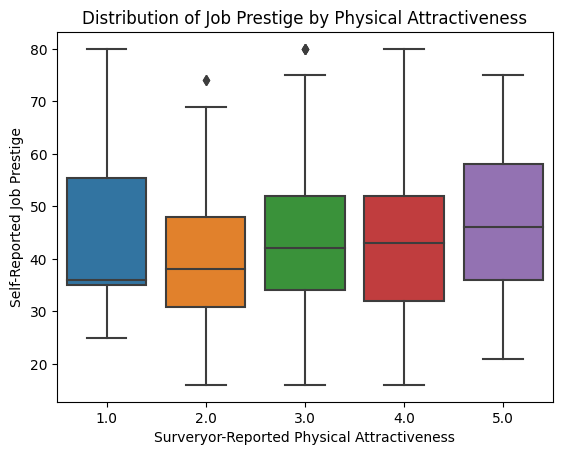

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=padf, x='RLOOKS', y='PRESTG10')

plt.xlabel('Surveryor-Reported Physical Attractiveness')
plt.ylabel('Self-Reported Job Prestige')
plt.title('Distribution of Job Prestige by Physical Attractiveness')
plt.show()

The distribution of the boxplot describing job prestige in the lowest physical attractiveness category demonstrates an extreme positive skew, with the lowest median, second-highest upper quartile, and highest maximum observed. By contrast, the distribution of job prestige for the highest physical attractiveness category shows the highest median with an almost perfect distribution. The strongest trend observed in the data is a strong positive correlation between median self-reported job prestige and survey-reported physical attractiveness, with a difference of medians of almost 10 points between the highest and lowest physical attractiveness categories. The conclusion we are able to draw from this observation is that as attractiveness increases, so does job prestige.This conclusion comes with a few caveats. The first being the amount of missing data for the
“RLOOKS” variable (1,872) in comparison to the missing data for “PRESTG10” (218). The second caveat
that exists is the question of consistent levels of subjectivity across levels of physical attractiveness. It could be the case that respondents who are viewed objectively attractive have a
corresponding subjective agreement with this valuation, which research has shown correlates to a
higher sense of entitlement (Teng et. al.). A higher sense of entitlement can be extrapolated and applied to how the surveyee self-reports their own job prestige, resulting in the trend observed. For our analysis, however, it is purposeful to assume normalized levels of subjectiveness when analyzing the variables in question, resulting in our conclusion being purely correlative. However, this conclusion is relatively weak due to significant overlaps between the boxplots for different levels of attractiveness.

***

<br>
Our second area of analysis dealt with correlations between “PRESTG10” ( x-axis) and
“OWNGUN” (y-axis) shown in Figure 2. We approached the analysis using a combined overlapping
histogram and kernel density line plot.

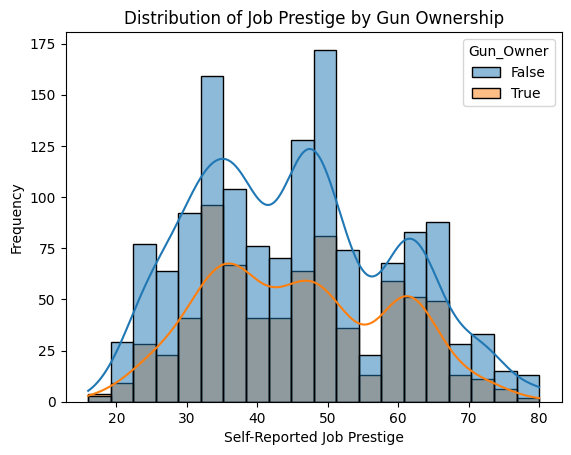

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
#plots both histogram & kernel density
sns.histplot(data=pgdf, x='PRESTG10', hue='Gun_Owner', multiple='layer', kde=True)

plt.xlabel('Self-Reported Job Prestige')
plt.ylabel('Frequency')
plt.title('Distribution of Job Prestige by Gun Ownership')

# Show the plot
plt.show()

We can see very similar shapes in the kernel density distribution,
with overlying peaks and valleys in frequency of job prestige for both gun owners and non gun owners. Another important observation is the relative smoothness of gun owners when compared to non gun owners across all levels of self-reported job prestige. Gun ownership has peaks, such as a mode between levels 30 and 40 of job prestige and the next most frequent level of gun ownership at 50 job prestige, but overall is not as drastic as non-gun ownership. This may be attributed to a lack of reporting for gun ownership, or another causal relationship that is undetermined based on the available data. Self-reported job prestige is skewed left, possibly indicating that people’s perceived prestige is lower than it actually may be. That said, there doesn’t appear to be a correlation between prestige and owning a gun.

***

<br>
The last area of analysis addressed the Distribution of Physical Attractiveness by Gun
Ownership, shown in Figure 3. The histogram shows percentages of total non-gun and gun owners
separated into five categories of attractiveness, from “very unattractive” (1) to “very attractive (5).

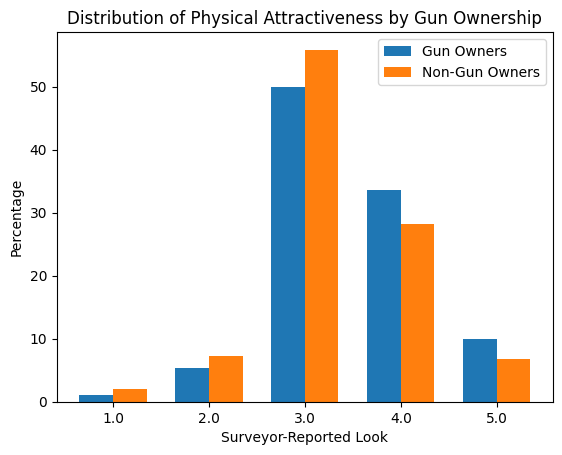

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

varx = 'RLOOKS'
vary = 'Gun_Owner'

# new data frame where Gun_Owner is True
gun_owners_df = agdf[agdf[vary] == True]

# new data fram where Gun_Owner is False
non_gun_owners_df = agdf[agdf[vary] == False]

# percentage of gun owners for each value of RLOOKS
percentage_gun_owner = gun_owners_df.groupby(varx).size() / len(gun_owners_df) * 100

# percentage of non-gun owners for each value of RLOOKS
percentage_non_gun_owner = non_gun_owners_df.groupby(varx).size() / len(non_gun_owners_df) * 100


bar_width = 0.35
x = np.arange(len(percentage_gun_owner))

# Plotting both distributions side by side
plt.bar(x - bar_width/2, percentage_gun_owner.values, bar_width, label='Gun Owners')
plt.bar(x + bar_width/2, percentage_non_gun_owner.values, bar_width, label='Non-Gun Owners')

plt.xlabel('Surveyor-Reported Look')
plt.ylabel('Percentage')
plt.title('Distribution of Physical Attractiveness by Gun Ownership')
plt.xticks(x, percentage_gun_owner.index)  # Set x-axis labels
plt.legend()

plt.show()

The most important initial observation to note is the distribution for all data is significantly skewed right, with 90.89% of surveyees receiving scores of 3 or higher on the attractiveness scale, and 36.23% of surveyees receiving a 4 or 5 compared to just 9.11% receiving a 1 or 2. This potentially skews the following observations of correlativity. However, an important correlation of the two variables can still be derived. While both more non-gun and gun owners are perceived as more attractive, a higher percentage of total gun owners received attractiveness scores of 4 and 5 than percentage of total non-gun owners did. From this available data, we can conclude that there is a stronger positive correlation between owning a gun and perceived attractiveness than there is between not owning a gun and perceived attractiveness. Of course, this is a correlative relationship and not causal.

It is also important to remember the significant amount of missing values for both
“RLOOKS” and “OWNGUN.” The attractiveness variable was only able to measure 47.2% of total
surveyees, and the gun-ownership variable failed to record a “YES” or “NO” answer from 35.9% of
total surveyees due to a lot of missing and blank data. Both numbers are significant, and thus
potentially had nullifying effects on our conclusion.

## Conclusion

Overall, this analysis explored the relationships between three variables: surveyor reported
attractiveness of the surveyee, gun ownership, and self-reported job prestige of the surveyee. The
analysis was organized into three comparisons: attractiveness and prestige, prestige and gun ownership, and gun ownership and attractiveness. There were two key observations. First, higher levels of attractiveness correlated positively with higher self-reported job prestige. The conclusion we can draw from this suggests people who perceive themselves as more successful have higher median levels of perceived attractiveness by others. Second, a higher percentage of gun-owners received attractiveness scores of 4 and 5 compared to non gun owners. From this correlative relationship, we conclude that if you own a gun, you are more likely to also be perceived as attractive than non-gun owners. The comparison between prestige and gun ownership yielded no correlative conclusion.

While we did find correlations, it is necessary to recognize that there was a significant amount
of missing values for both physical attractiveness and gun ownership variables due to the nature of the survey type (for attractiveness) and survey question (for gun ownership). Missing values in these variables forced us to ignore a chunk of data for self-reported job prestige variable where values did not overlap, reducing confidence in conclusions we drew. Additionally, the subjective nature of reporting physical attractiveness and self-reporting prestige introduces potential bias in the study. The surveyor could have underlying preferences that affect these ratings, resulting in correlations that could be misrepresentative and the individual could have a subjective perception of themselves, which may not represent their real-world prestige.

Future research should aim to address missing data issues in the “OWNGUN” and
“RLOOKS” variables, mitigate potential bias of the surveyor, and analyze possible causal relationships. For example, as mentioned previously, there may be a possible causal relationship between objective attractiveness and subjective attractiveness, and thus between objective attractiveness and self-reported levels of prestige.

## References

Fei Teng, et. al., “Mirror, Mirror on the Wall, I Deserve More Than All: Perceived Attractiveness and Self-Interested Behavior”, Evolution and Human Behavior, Volume 43, Issue 6, 2022, Pages
536-547, ISSN 1090-5138, https://doi.org/10.1016/j.evolhumbehav.2022.09.005.